In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
import cv2

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [4]:
%time

model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                          

In [5]:
len(model.layers)

22

In [6]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/cnn_model.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [7]:
%time

optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [9]:
plant = 'Potato'
df = pd.read_csv('/content/drive/MyDrive/DATASET/Pixel_File_'+plant+'.csv')

In [10]:
df = df.sample(frac = 1)
df = df.reset_index()
df = df.drop(columns = ['Unnamed: 0','index'])

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,128,124,130,132,128,134,140,136,142,135,...,148,144,155,154,150,161,148,144,155,1
2,176,162,167,175,161,165,173,159,163,177,...,112,102,114,118,108,120,107,97,109,2
3,154,142,150,155,142,150,149,136,144,155,...,115,98,111,108,91,104,119,102,115,2
4,161,148,150,158,145,147,158,147,149,175,...,187,175,181,189,178,180,194,183,185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7123,143,141,147,141,139,145,153,149,155,152,...,128,124,130,122,118,124,122,118,125,2
7124,173,154,157,156,137,140,119,102,105,145,...,199,183,184,183,167,168,203,187,188,0
7125,162,149,151,155,142,144,167,153,157,165,...,185,172,174,174,157,160,175,158,161,0
7126,111,96,100,154,139,143,109,94,98,129,...,187,174,176,198,184,185,192,178,179,0


In [12]:
print(len(df))
y = df.label
x = df.drop(columns = ['label'])

7128


In [13]:
print(y)
print(x)

0       1
1       1
2       2
3       2
4       0
       ..
7123    2
7124    0
7125    0
7126    0
7127    0
Name: label, Length: 7128, dtype: int64
        0    1    2    3    4    5    6    7    8    9  ...  2342  2343  2344  \
0       0    0    0    0    0    0    0    0    0    1  ...     3     0     0   
1     128  124  130  132  128  134  140  136  142  135  ...   139   148   144   
2     176  162  167  175  161  165  173  159  163  177  ...   119   112   102   
3     154  142  150  155  142  150  149  136  144  155  ...   108   115    98   
4     161  148  150  158  145  147  158  147  149  175  ...   183   187   175   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
7123  143  141  147  141  139  145  153  149  155  152  ...   130   128   124   
7124  173  154  157  156  137  140  119  102  105  145  ...   166   199   183   
7125  162  149  151  155  142  144  167  153  157  165  ...   169   185   172   
7126  111   96  100  154  139  143  109 

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [15]:
x_train = np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

In [17]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.1,
                    batch_size = 64,
                    epochs = 30,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/30
67/68 [============================>.] - ETA: 0s - loss: 0.9730 - accuracy: 0.7917

68/68 [==============================] - 5s 70ms/step - loss: 0.9730 - accuracy: 0.7915 - val_loss: 0.7844 - val_accuracy: 0.8577
Epoch 2/30
67/68 [============================>.] - ETA: 0s - loss: 0.9334 - accuracy: 0.8071

68/68 [==============================] - 6s 83ms/step - loss: 0.9339 - accuracy: 0.8071 - val_loss: 0.7601 - val_accuracy: 0.8619
Epoch 3/30
67/68 [============================>.] - ETA: 0s - loss: 0.9044 - accuracy: 0.8162

68/68 [==============================] - 5s 71ms/step - loss: 0.9050 - accuracy: 0.8159 - val_loss: 0.7382 - val_accuracy: 0.8682
Epoch 4/30
67/68 [============================>.] - ETA: 0s - loss: 0.8977 - accuracy: 0.8214

68/68 [==============================] - 5s 77ms/step - loss: 0.8976 - accuracy: 0.8213 - val_loss: 0.7219 - val_accuracy: 0.8703
Epoch 5/30
67/68 [============================>.] - ETA: 0s - loss: 0.8645 - accuracy: 0.8253

68/68 [==============================] - 5s 78ms/step - loss: 0.8644 - accuracy: 0.8252 - val_loss: 0.7045 - val_accuracy: 0.8766
Epoch 6/30
67/68 [============================>.] - ETA: 0s - loss: 0.8421 - accuracy: 0.8363

68/68 [==============================] - 5s 70ms/step - loss: 0.8413 - accuracy: 0.8366 - val_loss: 0.6866 - val_accuracy: 0.8870
Epoch 7/30
67/68 [============================>.] - ETA: 0s - loss: 0.8226 - accuracy: 0.8421

68/68 [==============================] - 6s 84ms/step - loss: 0.8228 - accuracy: 0.8418 - val_loss: 0.6665 - val_accuracy: 0.8954
Epoch 8/30
67/68 [============================>.] - ETA: 0s - loss: 0.7920 - accuracy: 0.8538

68/68 [==============================] - 5s 72ms/step - loss: 0.7922 - accuracy: 0.8536 - val_loss: 0.6508 - val_accuracy: 0.8996
Epoch 9/30
67/68 [============================>.] - ETA: 0s - loss: 0.7748 - accuracy: 0.8538

68/68 [==============================] - 5s 73ms/step - loss: 0.7756 - accuracy: 0.8534 - val_loss: 0.6334 - val_accuracy: 0.8975
Epoch 10/30
67/68 [============================>.] - ETA: 0s - loss: 0.7425 - accuracy: 0.8636

68/68 [==============================] - 5s 79ms/step - loss: 0.7427 - accuracy: 0.8636 - val_loss: 0.6178 - val_accuracy: 0.8975
Epoch 11/30
67/68 [============================>.] - ETA: 0s - loss: 0.7355 - accuracy: 0.8633

68/68 [==============================] - 5s 70ms/step - loss: 0.7357 - accuracy: 0.8632 - val_loss: 0.6020 - val_accuracy: 0.8954
Epoch 12/30
67/68 [============================>.] - ETA: 0s - loss: 0.7158 - accuracy: 0.8729

68/68 [==============================] - 6s 85ms/step - loss: 0.7163 - accuracy: 0.8725 - val_loss: 0.5899 - val_accuracy: 0.8954
Epoch 13/30
67/68 [============================>.] - ETA: 0s - loss: 0.6918 - accuracy: 0.8743

68/68 [==============================] - 5s 69ms/step - loss: 0.6931 - accuracy: 0.8741 - val_loss: 0.5725 - val_accuracy: 0.8954
Epoch 14/30
67/68 [============================>.] - ETA: 0s - loss: 0.6693 - accuracy: 0.8811

68/68 [==============================] - 5s 72ms/step - loss: 0.6700 - accuracy: 0.8811 - val_loss: 0.5604 - val_accuracy: 0.9017
Epoch 15/30
67/68 [============================>.] - ETA: 0s - loss: 0.6533 - accuracy: 0.8890

68/68 [==============================] - 6s 83ms/step - loss: 0.6540 - accuracy: 0.8890 - val_loss: 0.5448 - val_accuracy: 0.9038
Epoch 16/30
67/68 [============================>.] - ETA: 0s - loss: 0.6404 - accuracy: 0.8869

68/68 [==============================] - 5s 69ms/step - loss: 0.6402 - accuracy: 0.8869 - val_loss: 0.5322 - val_accuracy: 0.9017
Epoch 17/30
68/68 [==============================] - ETA: 0s - loss: 0.6181 - accuracy: 0.8946

68/68 [==============================] - 6s 89ms/step - loss: 0.6181 - accuracy: 0.8946 - val_loss: 0.5194 - val_accuracy: 0.9059
Epoch 18/30
67/68 [============================>.] - ETA: 0s - loss: 0.6136 - accuracy: 0.8974

68/68 [==============================] - 8s 112ms/step - loss: 0.6161 - accuracy: 0.8971 - val_loss: 0.5077 - val_accuracy: 0.9079
Epoch 19/30
67/68 [============================>.] - ETA: 0s - loss: 0.5922 - accuracy: 0.8934

68/68 [==============================] - 6s 86ms/step - loss: 0.5939 - accuracy: 0.8929 - val_loss: 0.4994 - val_accuracy: 0.9079
Epoch 20/30
67/68 [============================>.] - ETA: 0s - loss: 0.5935 - accuracy: 0.9007

68/68 [==============================] - 5s 72ms/step - loss: 0.5930 - accuracy: 0.9006 - val_loss: 0.4895 - val_accuracy: 0.9038
Epoch 21/30
67/68 [============================>.] - ETA: 0s - loss: 0.5599 - accuracy: 0.9035

68/68 [==============================] - 5s 71ms/step - loss: 0.5593 - accuracy: 0.9037 - val_loss: 0.4816 - val_accuracy: 0.9059
Epoch 22/30
67/68 [============================>.] - ETA: 0s - loss: 0.5388 - accuracy: 0.9076

68/68 [==============================] - 6s 84ms/step - loss: 0.5401 - accuracy: 0.9074 - val_loss: 0.4742 - val_accuracy: 0.9079
Epoch 23/30
67/68 [============================>.] - ETA: 0s - loss: 0.5486 - accuracy: 0.9037

68/68 [==============================] - 5s 74ms/step - loss: 0.5478 - accuracy: 0.9039 - val_loss: 0.4624 - val_accuracy: 0.9059
Epoch 24/30
67/68 [============================>.] - ETA: 0s - loss: 0.5317 - accuracy: 0.9123

68/68 [==============================] - 6s 82ms/step - loss: 0.5336 - accuracy: 0.9118 - val_loss: 0.4550 - val_accuracy: 0.9079
Epoch 25/30
67/68 [============================>.] - ETA: 0s - loss: 0.5226 - accuracy: 0.9123

68/68 [==============================] - 5s 77ms/step - loss: 0.5227 - accuracy: 0.9123 - val_loss: 0.4506 - val_accuracy: 0.9079
Epoch 26/30
67/68 [============================>.] - ETA: 0s - loss: 0.4970 - accuracy: 0.9223

68/68 [==============================] - 5s 72ms/step - loss: 0.4966 - accuracy: 0.9225 - val_loss: 0.4429 - val_accuracy: 0.9079
Epoch 27/30
67/68 [============================>.] - ETA: 0s - loss: 0.4932 - accuracy: 0.9209

68/68 [==============================] - 6s 85ms/step - loss: 0.4940 - accuracy: 0.9206 - val_loss: 0.4351 - val_accuracy: 0.9059
Epoch 28/30
67/68 [============================>.] - ETA: 0s - loss: 0.4847 - accuracy: 0.9200

68/68 [==============================] - 5s 71ms/step - loss: 0.4874 - accuracy: 0.9195 - val_loss: 0.4282 - val_accuracy: 0.9100
Epoch 29/30
67/68 [============================>.] - ETA: 0s - loss: 0.4552 - accuracy: 0.9277

68/68 [==============================] - 6s 85ms/step - loss: 0.4550 - accuracy: 0.9279 - val_loss: 0.4194 - val_accuracy: 0.9100
Epoch 30/30
67/68 [============================>.] - ETA: 0s - loss: 0.4556 - accuracy: 0.9223

68/68 [==============================] - 5s 68ms/step - loss: 0.4560 - accuracy: 0.9223 - val_loss: 0.4150 - val_accuracy: 0.9121
Duration: 0:02:39.014120


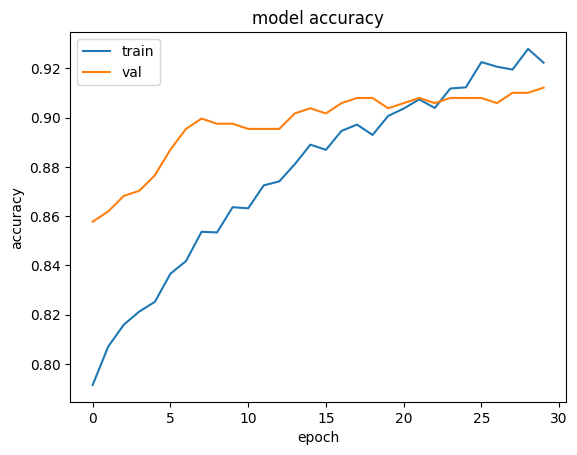

val 0.9121338725090027
min val 0.857740581035614
acc 0.9278566241264343
mean val 0.8970711330572764


In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])


plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

In [19]:
x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)

148/148 [==============================] - 1s 10ms/step


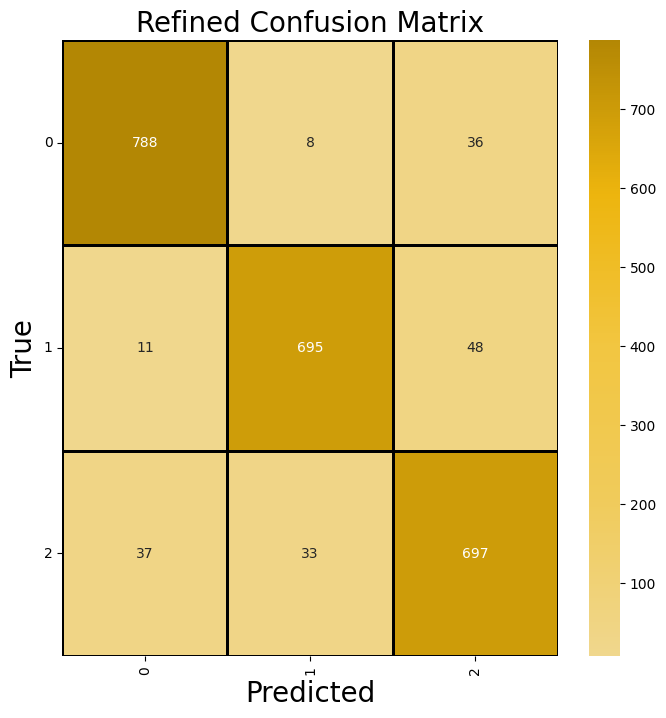

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
Pred = model.predict(x_test, batch_size=16)
Pred_Label = np.argmax(Pred, axis=1)
cmap_unblended = sns.blend_palette(["#f0d78d","#f0cb5b","#f2c641","#edb50e","#b38704"], as_cmap=True)
ConfusionM = confusion_matrix(list(y_test), Pred_Label, labels=[0,1,2])
cm = ConfusionM
targetnames = [0,1,2]
class_names = targetnames
# Plot confusion matrix
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
sns.heatmap(cm,cmap= cmap_unblended, linecolor = 'black' , linewidth = 1 , annot = True, fmt=''); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

(2353,)
ROC AUC score: 0.9445731231919213


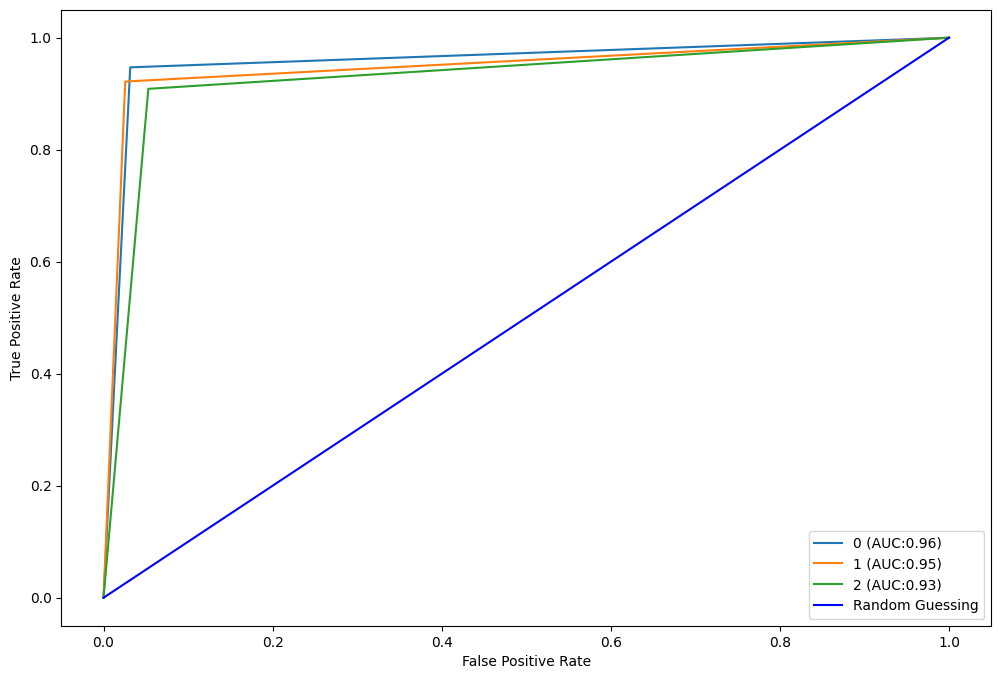

In [26]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= [0,1,2]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    print(y_test.shape)
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)



print('ROC AUC score:', multiclass_roc_auc_score(y_test, Pred_Label))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()


In [27]:
from sklearn.metrics import classification_report
targetnames = [0,1,2]
tar = []
for i in targetnames:
  tar.append(str(i))
class_report = classification_report(list(y_test), Pred_Label, labels=[0, 1, 2], target_names=tar)

In [28]:
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       832
           1       0.94      0.92      0.93       754
           2       0.89      0.91      0.90       767

    accuracy                           0.93      2353
   macro avg       0.93      0.93      0.93      2353
weighted avg       0.93      0.93      0.93      2353



In [31]:
model.save_weights('/content/drive/MyDrive/MODELS/Potato/cnn_model_weights.h5')

In [32]:
model.save('/content/drive/MyDrive/MODELS/Potato/cnn_model.h5')